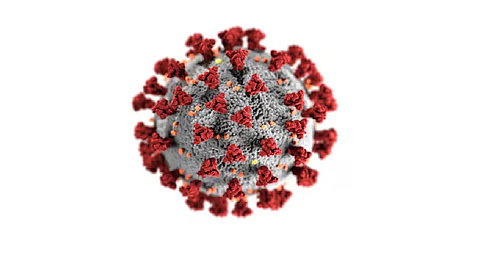

## COVID-19 PROJECT

**Importing primary libraries**

In [230]:
import numpy as np
import pandas as pd

**Loading the Dataset**

In [232]:
df = pd.read_csv(r"E:\Drive\Covid-19 Project\covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


**Sepearting the Data country-wise**

In [234]:
country_dfs = {}

for country in df['Country/Region'].unique():
    df_country = df[df['Country/Region'] == country]
    df_country = df_country.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
    country_dfs[country] = df_country


**EDA**

In [236]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         188 non-null    datetime64[ns]
 1   Confirmed    188 non-null    int64         
 2   Deaths       188 non-null    int64         
 3   Recovered    188 non-null    int64         
 4   Active       188 non-null    int64         
 5   New_Cases    188 non-null    float64       
 6   Growth_Rate  188 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 10.4 KB


In [237]:
df_india.describe()

,Date,Confirmed,Deaths,Recovered,Active,New_Cases,Growth_Rate
count,188,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000
mean,2020-04-24 12:00:00,2.174652e+05,5913.994681,126509.148936,85042.090426,7872.728723,inf
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-08 18:00:00,4.200000e+01,0.000000,3.000000,39.000000,5.750000,3.271036
50%,2020-04-24 12:00:00,2.540650e+04,802.500000,5718.500000,18885.500000,1657.000000,4.291325
75%,2020-06-10 06:00:00,2.893375e+05,8201.000000,138203.250000,142205.750000,10716.250000,7.305523
max,2020-07-27 00:00:00,1.480073e+06,33408.000000,951166.000000,495499.000000,49981.000000,inf
std,NaN,3.544779e+05,9000.138147,223808.885559,122839.589861,12016.207817,NaN


In [238]:
df_india.duplicated().sum()

0

In [239]:
df_india.sort_values("Date")

,Date,Confirmed,Deaths,Recovered,Active,New_Cases,Growth_Rate
0,2020-01-22,0,0,0,0,0.0,0.000000
1,2020-01-23,0,0,0,0,0.0,0.000000
2,2020-01-24,0,0,0,0,0.0,0.000000
3,2020-01-25,0,0,0,0,0.0,0.000000
4,2020-01-26,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298,49310.0,3.980471
184,2020-07-24,1337024,31358,849432,456234,48916.0,3.797508
185,2020-07-25,1385635,32060,885573,468002,48611.0,3.635761
186,2020-07-26,1435616,32771,917568,485277,49981.0,3.607083


# **Use plotly (visualization library) to create interactive visualizations**

**Line Plot of Cumulative Cases Over Time (India)**

In [242]:
!pip install plotly

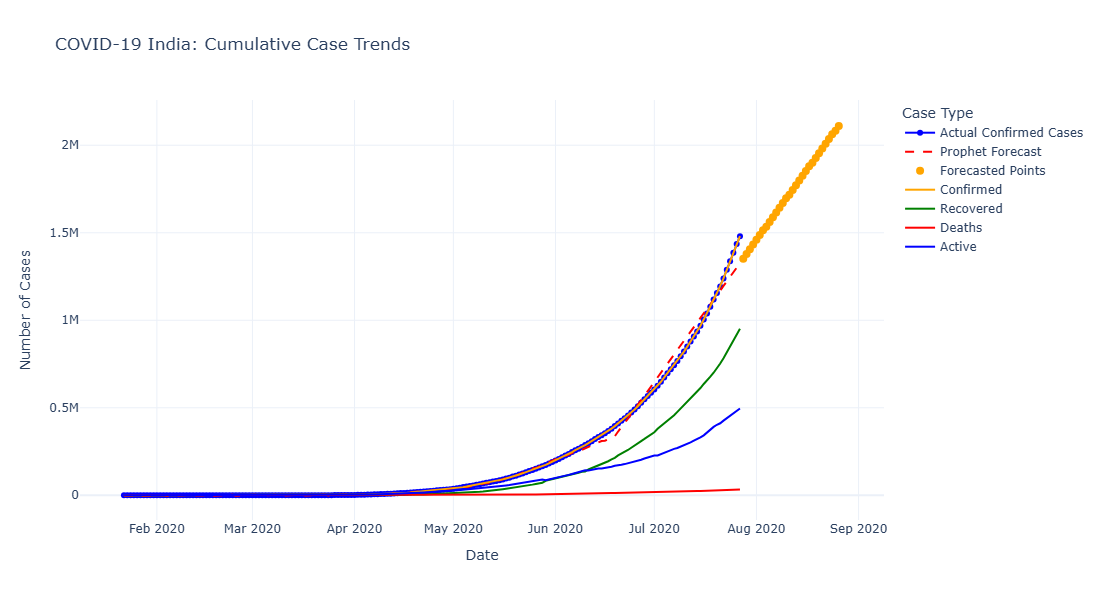

In [243]:
import plotly.graph_objects as go
ig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Confirmed'],
    mode='lines',
    name='Confirmed',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Recovered'],
    mode='lines',
    name='Recovered',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Deaths'],
    mode='lines',
    name='Deaths',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Active'],
    mode='lines',
    name='Active',
    line=dict(color='blue')
))

fig.update_layout(
    title="COVID-19 India: Cumulative Case Trends",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    legend_title="Case Type",
    template="plotly_white",
    height=600
)

fig.show()


**Bar Chart – Daily New Confirmed Cases**

In [245]:
df_india = df_india.sort_values('Date')

df_india['New_Cases'] = df_india['Confirmed'].diff().fillna(0)

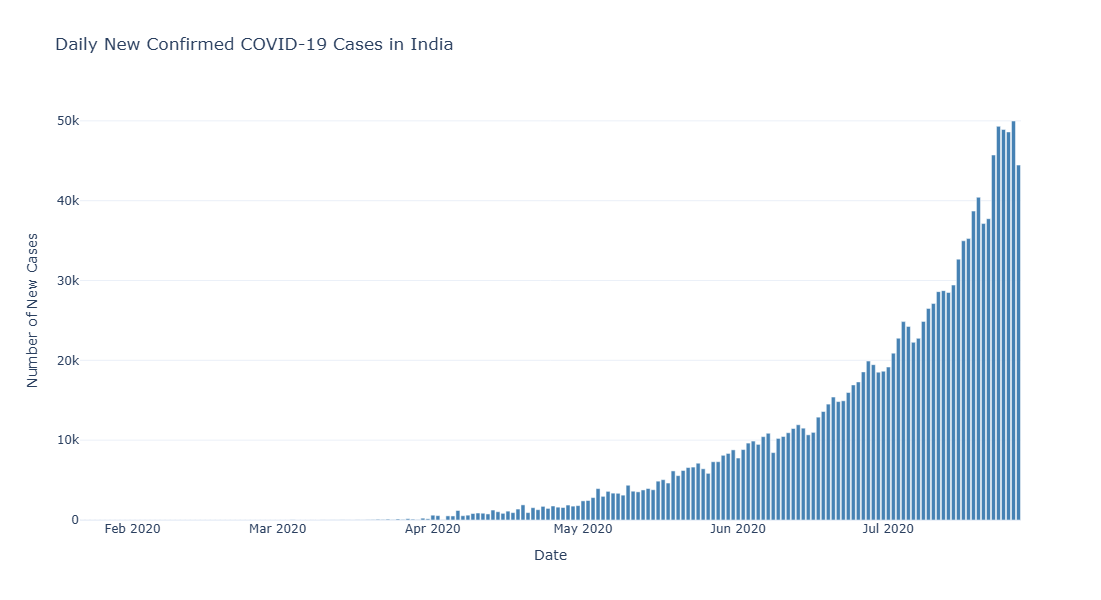

In [246]:
import plotly.express as px

fig = px.bar(
    df_india,
    x='Date',
    y='New_Cases',
    title='Daily New Confirmed COVID-19 Cases in India',
    labels={'New_Cases': 'New Confirmed Cases'},
    template='plotly_white',
    color_discrete_sequence=['steelblue']
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of New Cases',
    height=600
)

fig.show()


**Stacked Area Chart – Active, Recovered, Deaths**

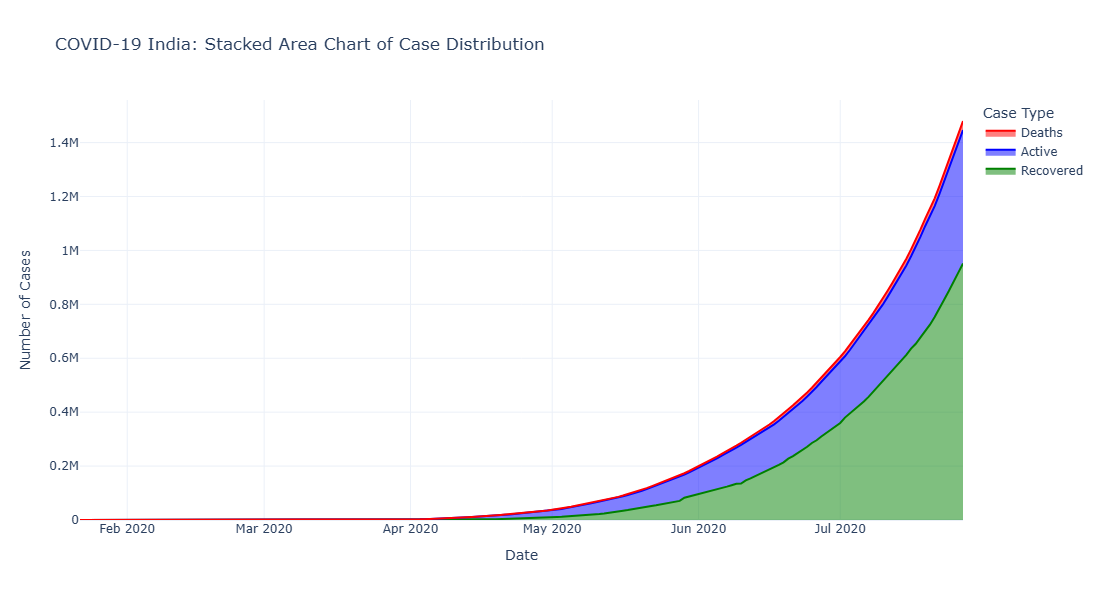

In [248]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Recovered'],
    mode='lines',
    name='Recovered',
    stackgroup='one',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Active'],
    mode='lines',
    name='Active',
    stackgroup='one',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df_india['Date'],
    y=df_india['Deaths'],
    mode='lines',
    name='Deaths',
    stackgroup='one',
    line=dict(color='red')
))

fig.update_layout(
    title='COVID-19 India: Stacked Area Chart of Case Distribution',
    xaxis_title='Date',
    yaxis_title='Number of Cases',
    template='plotly_white',
    legend_title='Case Type',
    height=600
)

fig.show()

**Pie Chart – Final Case Distribution**

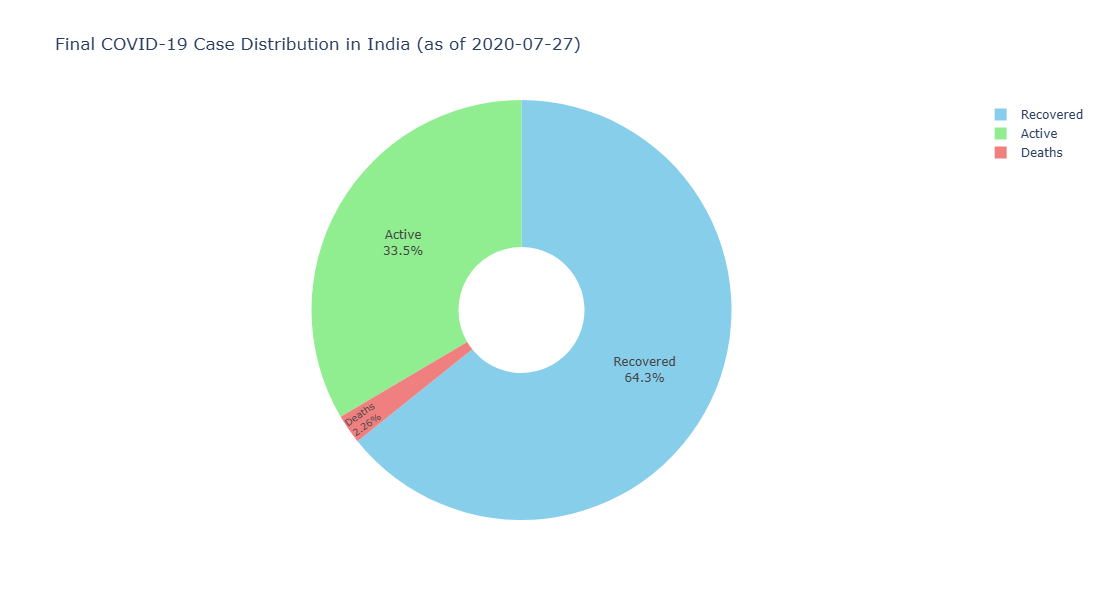

In [250]:

latest = df_india.iloc[-1]

pie_df = pd.DataFrame({
    'Case Type': ['Active', 'Recovered', 'Deaths'],
    'Count': [latest['Active'], latest['Recovered'], latest['Deaths']]
})

fig = px.pie(
    pie_df,
    names='Case Type',
    values='Count',
    title=f"Final COVID-19 Case Distribution in India (as of {latest['Date'].date()})",
    color_discrete_sequence=['skyblue', 'lightgreen', 'lightcoral'],
    hole=0.3 
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_white', height=600)

fig.show()


# Using Facebook prophet library

In [252]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [253]:
from prophet import Prophet
df_prophet = df_india[['Date', 'Confirmed']].rename(columns={
    'Date': 'ds',
    'Confirmed': 'y'
})

**Initialize and fit model**

In [257]:
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)
forecast =model.predict(future)



00:51:04 - cmdstanpy - INFO - Chain [1] start processing
00:51:04 - cmdstanpy - INFO - Chain [1] done processing


**Plotting the Prophet model using Plotly Library**

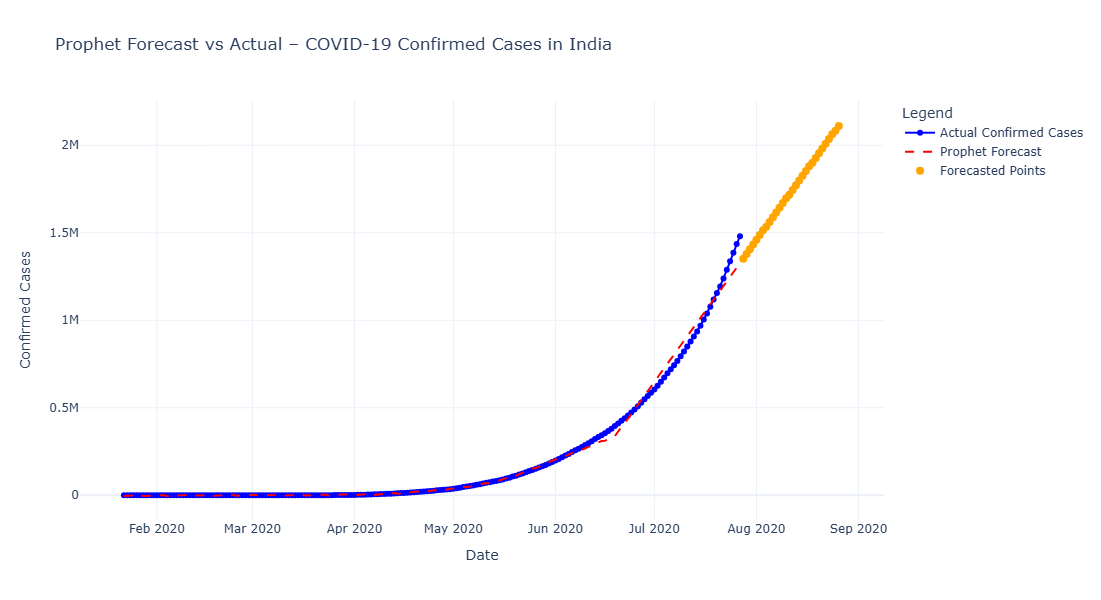

In [259]:

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_prophet['ds'],
    y=df_prophet['y'],
    mode='lines+markers',
    name='Actual Confirmed Cases',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Prophet Forecast',
    line=dict(color='red', dash='dash')
))

future_only = forecast[forecast['ds'] > df_prophet['ds'].max()]
fig.add_trace(go.Scatter(
    x=future_only['ds'],
    y=future_only['yhat'],
    mode='markers',
    name='Forecasted Points',
    marker=dict(size=8, color='orange')
))

fig.update_layout(
    title="Prophet Forecast vs Actual – COVID-19 Confirmed Cases in India",
    xaxis_title="Date",
    yaxis_title="Confirmed Cases",
    template="plotly_white",
    height=600,
    legend_title="Legend"
)

fig.show()
